In [1]:
import os
import re
import statistics
from src.najdi_rok import najdi_rok
from src.pocet_stran import pocet_stran
import pandas as pd
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 500)

In [131]:
df = pd.read_parquet(os.path.join("data","cnb_vyber.parquet"))
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [82]:
df[df['245_a'].str.contains('Fosili')]

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk19990642283,990204s1998 xr a e 001 0 cze,[80-7237-122-3],None,[(váz.)],[cze],[eng],1,None,[56],[Paleontologie],"[56.02, (084.42)]",None,None,None,None,None,Fosilie,None,None,None,None,[České vyd. 1.],None,[Praha :],"[Svojtka & Co.,]",[1998],None,None,None,None,None,None,None,[64 s. :],[barev. il. ;],[19 cm],[Obrazový průvodce ;],[13],[Z angličtiny přeložil Vojtěch Turek],None,None,None,None,None,"[fosilie, Fossils]",None,None,None,None,None,"[atlasy, Atlases]",[trl],[mzk2003181797],"[Turek, Vojtěch,]",[1949-],None,None,None,None,[Obrazový průvodce],None,None,nam a22 a 4500,1998.0
nkc20233549616,230925s2023 xr g 000 f cze,[978-80-7637-400-3],None,[(brožováno)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-31)]",[aut],jx20100301005,"Kašpárek, Michal,",1984-,None,Fosilie /,Michal Kašpárek,None,None,None,[Vydání první],None,None,None,None,None,None,None,[V Praze :],"[Paseka,]",[2023],[1],[183 stran ;],None,[20 cm],None,None,None,"[Tři generace, tři životní názory a postoje. D...","[Děda, bývalý učitel tělocviku, vnímá, že svět...",None,None,None,None,None,None,None,None,None,"[české romány, Czech fiction]",None,None,None,None,None,None,None,None,None,None,None,nam a22 i 4500,2023.0


In [132]:
df = df.dropna(subset=['245_a','100_7'])
df = df.drop_duplicates(subset=['245_a','100_7'])

In [133]:
autority = pd.read_parquet(os.path.join("data","aut_vyber.parquet"))

In [134]:
df = df.merge(autority[['046_f','046_g','370_c','375_a']], left_on="100_7", right_index=True, how="left")

In [135]:
df_predvyber = df[df['370_c'].astype(str).str.contains('Česko')]

In [136]:
nejplodnejsi = df_predvyber.groupby('100_7').size()
nejplodnejsi = nejplodnejsi[nejplodnejsi >= 5]
nejplodnejsi = nejplodnejsi.index.to_list()
nejplodnejsi

['av2014811888',
 'av2014851321',
 'av2014852990',
 'av20181005237',
 'av20181011653',
 'hka0022659',
 'hka0036458',
 'hka0044515',
 'hka0076000',
 'hka0076066',
 'hka0076158',
 'hka0078319',
 'hka0078531',
 'hka2010561602',
 'hka2010561754',
 'hka2010562386',
 'hka2010563580',
 'hka2010568795',
 'hka2010577128',
 'hka2010594288',
 'hka2010594303',
 'hka2010597360',
 'hka2010614604',
 'hka2010614607',
 'hka2011620540',
 'hka2011632770',
 'hka2011650257',
 'hka2011656128',
 'hka2011670499',
 'hka2011670500',
 'hka2011671039',
 'hka2012680750',
 'hka2012683295',
 'hka2012699590',
 'hka2012701740',
 'hka2012727386',
 'hka2012731471',
 'hka2013740663',
 'hka2013759935',
 'hka2013768070',
 'hka2013778175',
 'hka2013781027',
 'hka2013798896',
 'hka2013800178',
 'hka2014818836',
 'hka2015857739',
 'hka2015881597',
 'hka2015894510',
 'hka2015894512',
 'hka2015896783',
 'hka2016899365',
 'hka2016915459',
 'hka2016921219',
 'hka2016931737',
 'hka2016933781',
 'hka2016934615',
 'hka2017940165',
 

In [141]:
df_expl = df_predvyber.explode("655_a")

In [187]:
df_vyber = df_predvyber[df_predvyber['rok'] >= 1990]
df_vyber = df_vyber[df_vyber['100_7'].isin(nejplodnejsi)].explode('655_a')
df_vyber = df_vyber[df_vyber['655_a'].isin(nejcastejsi)]

In [197]:
nejcastejsi = df_expl.groupby('655_a').size().nlargest(10000).index.to_list()

In [231]:
nejcastejsi

['učebnice vysokých škol',
 'příručky',
 'monografie',
 'studie',
 'textbooks (higher)',
 'monographs',
 'handbooks and manuals',
 'publikace pro děti',
 'česká poezie',
 'české romány',
 'Czech poetry',
 "children's literature",
 'Czech fiction',
 'studies',
 'české příběhy',
 'informační publikace',
 'Czech stories',
 'fotografické publikace',
 'populárně-naučné publikace',
 'kolektivní monografie',
 'metodické příručky',
 'collective monographs',
 'přehledy',
 'photographical works',
 'information publications',
 'české povídky',
 'popular works',
 'obrazové publikace',
 'biografie',
 'sborníky',
 'učebnice středních škol',
 'CD-ROM',
 'české prózy',
 'surveys',
 'pictorial works',
 'autobiografické vzpomínky',
 'essays',
 'methodological manuals',
 'autobiographical reminiscences',
 'katalogy výstav',
 'učebnice základních škol',
 'Czech short stories',
 'brožury',
 'učební texty',
 'kuchařské recepty',
 'Czech prose',
 'biography',
 'jubilejní publikace',
 'pracovní sešity',
 'poj

In [241]:
romany = [x for x in nejcastejsi if 'romány' in str(x).lower() and "angl" not in x][1:21]
romany

['detektivní romány',
 'historické romány',
 'fantasy romány',
 'romány',
 'vědecko-fantastické romány',
 'milostné romány',
 'dobrodružné romány',
 'humoristické romány',
 'biografické romány',
 'thrillery (romány)',
 'romány pro ženy',
 'autobiografické romány',
 'psychologické romány',
 'dívčí romány',
 'válečné romány',
 'horory (romány)',
 'erotické romány',
 'společenské romány',
 'satirické romány',
 'německy psané romány']

In [ ]:
krasna = df_expl[df_expl['655_a'].isin(['česká poezie', 'české romány', 'české příběhy', 'české povídky','česká dramata','české novely','české pověsti','české pohádky','eseje','úvahy'])]

In [165]:
krasna = df_expl[df_expl['655_a'].isin(['česká poezie', 'české romány', 'české příběhy', 'české povídky','česká dramata','české novely','české pověsti','české pohádky','eseje','úvahy'])]

In [67]:
vyber = ['Česká próza','Česká poezie','Česká literatura (o ní)','Chov zvířat. Živočišná výroba','Lesnictví','Botanika','Zemědělství. Pedologie. Agrotechnika. Agroekologie']

In [93]:
import numpy as np

def create_genre_correlation_matrix(df):
    """
    Create a correlation matrix showing relationships between genres based on shared authors.
    
    Parameters:
    df (pandas.DataFrame): DataFrame with columns '100_7' (author codes) and '655_a' (genres)
    
    Returns:
    pandas.DataFrame: Correlation matrix of genres
    """
    # First, we need to explode the genre lists to get one row per author-genre pair
    df_exploded = df.explode('655_a')
    
    # Create a pivot table where:
    # - Rows are author codes
    # - Columns are genres
    # - Values are 1 if the author writes in that genre, 0 if not
    genre_matrix = pd.crosstab(
        df_exploded['100_7'],
        df_exploded['655_a']
    )
    
    # Calculate the correlation matrix
    correlation_matrix = genre_matrix.corr()
    
    # Round to 2 decimal places for readability
    correlation_matrix = correlation_matrix.round(2)
    
    return correlation_matrix

def analyze_genre_relationships(correlation_matrix, threshold=0.5):
    """
    Analyze and print strongly correlated and independent genres.
    
    Parameters:
    correlation_matrix (pandas.DataFrame): The correlation matrix
    threshold (float): Correlation coefficient threshold (default: 0.5)
    """
    # Get upper triangle of correlation matrix (excluding diagonal)
    upper_tri = correlation_matrix.where(
        np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
    )
    
    # Find strong positive correlations
    strong_correlations = upper_tri[upper_tri >= threshold].stack()
    
    # Find weak correlations (independent genres)
    weak_correlations = upper_tri[abs(upper_tri) <= 0.2].stack()
    
    print("Strongly correlated genres (correlation >= {}):\n".format(threshold))
    for idx, value in strong_correlations.items():
        print(f"{idx[0]} and {idx[1]}: {value:.2f}")
    
    print("\nMost independent genres (correlation <= 0.2):\n")
    for idx, value in weak_correlations.items():
        print(f"{idx[0]} and {idx[1]}: {value:.2f}")

# Example usage:
"""
# Assuming your DataFrame is called 'df':
correlation_matrix = create_genre_correlation_matrix(df)

# Display the full correlation matrix
print("Full correlation matrix:")
print(correlation_matrix)

# Analyze relationships
analyze_genre_relationships(correlation_matrix, threshold=0.5)
"""

'\n# Assuming your DataFrame is called \'df\':\ncorrelation_matrix = create_genre_correlation_matrix(df)\n\n# Display the full correlation matrix\nprint("Full correlation matrix:")\nprint(correlation_matrix)\n\n# Analyze relationships\nanalyze_genre_relationships(correlation_matrix, threshold=0.5)\n'

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def create_genre_correlation_matrix(df):
    """
    Create a correlation matrix showing relationships between genres based on shared authors.
    
    Parameters:
    df (pandas.DataFrame): DataFrame with columns '100_7' (author codes) and '072_x' (genres)
    
    Returns:
    pandas.DataFrame: Correlation matrix of genres
    """
    # First, we need to explode the genre lists to get one row per author-genre pair
    df_exploded = df.explode('655_a')
    
    # Create a pivot table where:
    # - Rows are author codes
    # - Columns are genres
    # - Values are 1 if the author writes in that genre, 0 if not
    genre_matrix = pd.crosstab(
        df_exploded['100_7'],
        df_exploded['655_a']
    )
    
    # Calculate the correlation matrix
    correlation_matrix = genre_matrix.corr()
    
    # Round to 2 decimal places for readability
    correlation_matrix = correlation_matrix.round(2)
    
    return correlation_matrix

def plot_correlation_heatmap(correlation_matrix, figsize=(12, 10), cmap='RdBu_r'):
    """
    Create a heatmap visualization of the correlation matrix.
    
    Parameters:
    correlation_matrix (pandas.DataFrame): The correlation matrix to visualize
    figsize (tuple): Figure size in inches (width, height)
    cmap (str): Color map to use (default: 'RdBu_r' for red-blue diverging)
    
    Returns:
    matplotlib.figure.Figure: The generated figure
    """
    # Create figure and axes
    plt.figure(figsize=figsize)
    
    # Create heatmap
    sns.heatmap(
        correlation_matrix,
        annot=True,  # Show correlation values
        cmap=cmap,   # Color scheme
        center=0,    # Center the colormap at 0
        vmin=-1,     # Minimum correlation value
        vmax=1,      # Maximum correlation value
        square=True, # Make cells square
        fmt='.2f',   # Format for correlation values
        cbar_kws={'label': 'Correlation Coefficient'}
    )
    
    # Customize the plot
    plt.title('Genre Correlation Heatmap', pad=20)
    plt.tight_layout()
    
    return plt.gcf()

def analyze_and_visualize_genres(df, plot_kwargs=None):
    """
    Complete analysis function that creates the correlation matrix and visualizes it.
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame with author and genre information
    plot_kwargs (dict): Optional kwargs for plot customization
    
    Returns:
    tuple: (correlation_matrix, figure)
    """
    # Default plot parameters
    if plot_kwargs is None:
        plot_kwargs = {}
    
    # Create correlation matrix
    corr_matrix = create_genre_correlation_matrix(df)
    
    # Create visualization
    fig = plot_correlation_heatmap(corr_matrix, **plot_kwargs)
    
    return corr_matrix, fig

# Example usage:
"""
# Assuming your DataFrame is called 'df':

# Basic usage
corr_matrix, fig = analyze_and_visualize_genres(df)
plt.show()

# Customized visualization
custom_params = {
    'figsize': (15, 12),
    'cmap': 'viridis'  # Alternative color scheme
}
corr_matrix, fig = analyze_and_visualize_genres(df, plot_kwargs=custom_params)
plt.show()
"""

"\n# Assuming your DataFrame is called 'df':\n\n# Basic usage\ncorr_matrix, fig = analyze_and_visualize_genres(df)\nplt.show()\n\n# Customized visualization\ncustom_params = {\n    'figsize': (15, 12),\n    'cmap': 'viridis'  # Alternative color scheme\n}\ncorr_matrix, fig = analyze_and_visualize_genres(df, plot_kwargs=custom_params)\nplt.show()\n"

In [ ]:
corr_matrix, fig = analyze_and_visualize_genres(df_expl[df_expl['655_a'].isin(romany)])
plt.show()

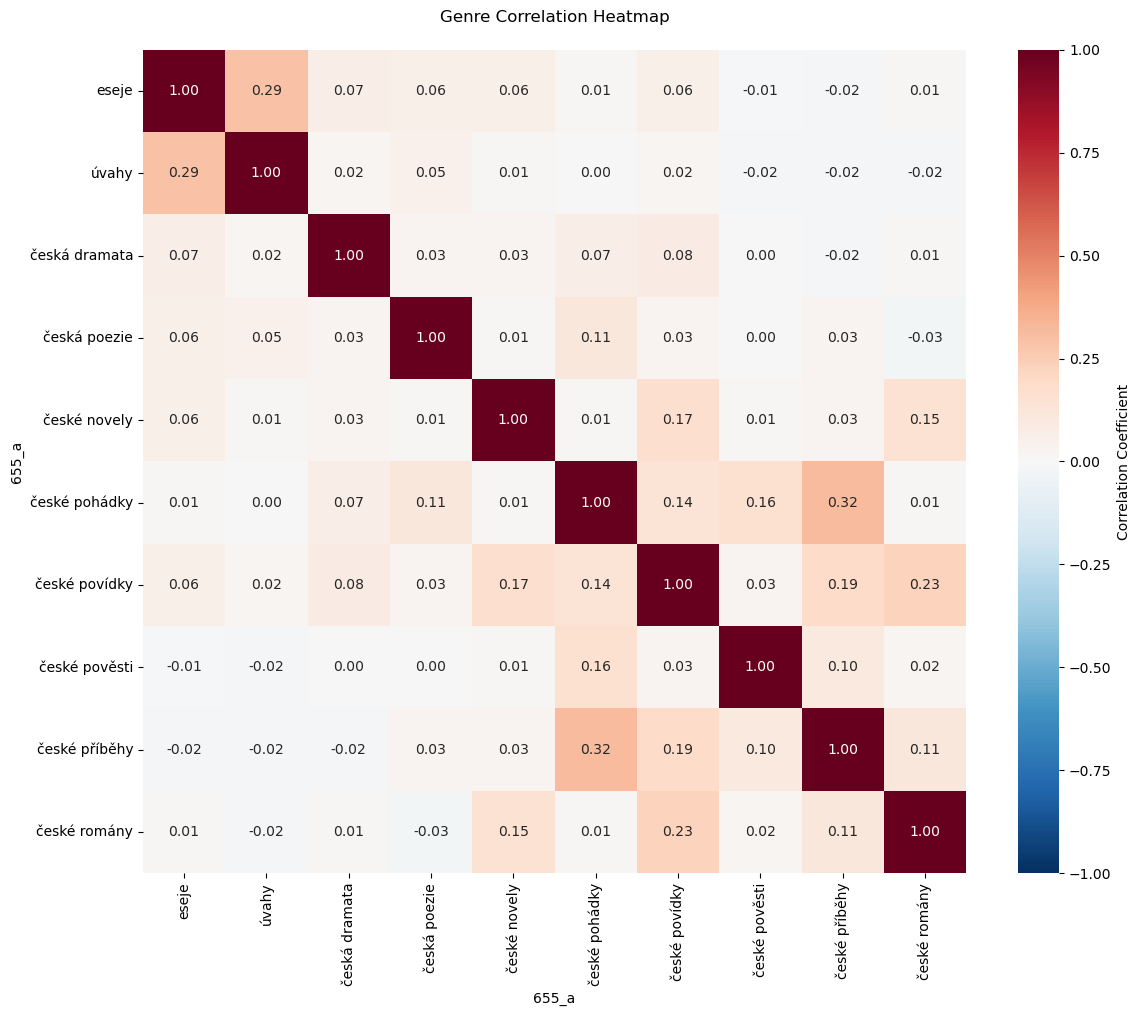

In [167]:
corr_matrix, fig = analyze_and_visualize_genres(krasna)
plt.show()

In [58]:
create_genre_correlation_matrix(df_expl)

072_x,Architektura,Biografie,Dějiny Česka a Slovenska,"Geografie Česka a Slovenska, reálie, cestování",Kuchařství. Potraviny. Vařená jídla,Lingvistika. Jazyky,Literatura pro děti a mládež (beletrie),Literatura pro děti a mládež (naučná),Patologie. Klinická medicína,Programování. Software,Předškolní a primární výchova a vzdělávání,Sport. Hry. Tělesná cvičení,Učební osnovy. Vyučovací předměty. Učebnice,Vlastivěda Česka a Slovenska,Vojenství. Obrana země. Ozbrojené síly,Výchova a vzdělávání,Česká poezie,Česká próza,Čeština,Řízení a správa podniku
072_x,,,,,,,,,,,,,,,,,,,,
Architektura,1.00,0.00,0.09,0.12,-0.01,-0.00,-0.02,0.23,-0.02,-0.01,-0.02,-0.01,-0.06,0.11,-0.00,-0.02,-0.03,-0.03,-0.02,-0.01
Biografie,0.00,1.00,0.26,-0.01,-0.02,-0.00,-0.04,-0.03,-0.02,-0.04,-0.05,0.22,-0.17,0.06,0.23,-0.03,0.01,0.10,-0.05,-0.04
Dějiny Česka a Slovenska,0.09,0.26,1.00,0.07,-0.02,-0.00,-0.03,0.00,-0.03,-0.02,-0.02,-0.01,-0.07,0.28,0.16,-0.03,-0.05,0.03,-0.02,-0.03
"Geografie Česka a Slovenska, reálie, cestování",0.12,-0.01,0.07,1.00,-0.01,-0.00,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,-0.05,0.46,-0.00,-0.02,-0.02,-0.02,-0.01,-0.02
Kuchařství. Potraviny. Vařená jídla,-0.01,-0.02,-0.02,-0.01,1.00,0.01,-0.00,0.00,0.01,-0.01,-0.01,-0.01,-0.04,-0.01,-0.02,-0.02,-0.02,-0.02,-0.01,-0.01
Lingvistika. Jazyky,-0.00,-0.00,-0.00,-0.00,0.01,1.00,-0.00,-0.00,0.52,-0.00,-0.00,0.01,-0.01,-0.00,0.01,0.01,-0.00,-0.01,0.01,0.36
Literatura pro děti a mládež (beletrie),-0.02,-0.04,-0.03,-0.02,-0.00,-0.00,1.00,0.25,-0.03,-0.02,0.20,-0.01,-0.09,-0.01,-0.03,-0.01,0.19,0.51,0.05,-0.04
Literatura pro děti a mládež (naučná),0.23,-0.03,0.00,-0.01,0.00,-0.00,0.25,1.00,-0.01,-0.01,0.49,0.00,-0.03,0.02,-0.02,0.00,0.01,0.06,0.18,-0.03
Patologie. Klinická medicína,-0.02,-0.02,-0.03,-0.01,0.01,0.52,-0.03,-0.01,1.00,-0.01,-0.02,-0.01,-0.02,-0.02,-0.01,-0.01,-0.03,-0.04,-0.01,0.17
